# Spotify Podcast Dataset - Reading Transcripts

Attempt to come up with an API to support batch processing of transcripts for this data set.

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('../podcasts-no-audio-13GB-selected/metadata.tsv', sep='\t')

In [16]:
basename = '../podcasts-no-audio-13GB-selected/spotify-podcasts-2020/show-rss/'

In [17]:
# Locations of episodes are based on two levels of folders: 
#    first_folder/second_folder/show/episode_metadata.json
# To figure out the first_folder and second_folder by looking at 
# the first two characters in the show_uri column.

# Then you can extract the transcripts...

df['first_dir'] = df['show_uri'].str.extract(r'spotify:show:(\w)')[0]
df['second_dir'] = df['show_uri'].str.extract(r'spotify:show:\w(\w)')[0]

## Attempt to extract the RSS category metadata of a show.

Find all the categories in "4G" folder

In [19]:
import xml.etree.ElementTree as ET

def find_category(file): 
    extracted_data = []
    
    # Parse the XML file
    tree = ET.parse(file)
    root = tree.getroot()
    
    # Iterate through the XML elements
    for element in root.iter():
        # Check if the element name contains "category"
        if 'category' in element.tag:
            # Check if the element has a "text" attribute
            if 'text' in element.attrib:
                # Extract and store the data from the "text" attribute
                text_data = element.attrib['text']
                extracted_data.append(text_data)
    
    return extracted_data

In [45]:
df['show_filename_prefix'].dropna().unique().shape

(18376,)

In [49]:
files_found_counter = 0
categories = []
category_tuple_list = []
# Iterate through files in the folder and its subdirectories
for root, dirs, files in os.walk(basename):
    for filename in files:
        # Check if the file is a JSON file
        if filename.endswith('.xml'):
            # TODO / ISSUE: there are two more xml files found based on the 
            # metadata file's number of possible shows.
            # TODO / ISSUE: there are 8 errors in valid show RSS files.
            try:
                files_found_counter += 1
                file_path = os.path.join(root, filename)
                cats = find_category(file_path)
                categories.extend(cats)
                category_tuple_list.append((filename[:-4], ','.join(cats)))
            except:
                print(f"Error in file: {filename}")
print(files_found_counter)
print(len(set(categories)))

Error in file: show_0mPNCwVSQ8ggY3Wo3a4RPy.xml
Error in file: show_0mmkBlmEqlEWzMeLGWy4Wy.xml
Error in file: show_0deezmILkTBDuYDKucY5mx.xml
Error in file: show_0KbQ39FLDGiQkEq1WMcqjV.xml
Error in file: show_6zSmRhYdSy1f2yXIZFRlBE.xml
Error in file: show_4HQGW7WAjn5QB8F8gd8jE9.xml
Error in file: show_3LKjtl2pOvhqsp6GnoGkWi.xml
Error in file: show_5h1lw7E7efT5r9LeOkPA7b.xml
18378
122


In [40]:
import matplotlib.pyplot as plt
from collections import Counter

In [41]:
category_counts = Counter(categories)
sorted_counts = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True)[:5])

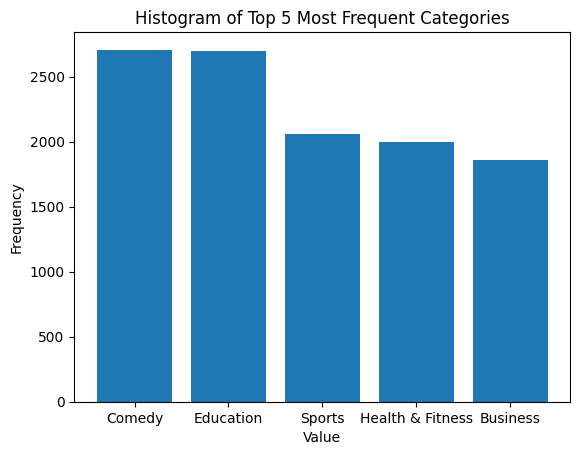

In [44]:
values, frequencies = zip(*sorted_counts.items())
plt.bar(values, frequencies)

# Add labels and title
plt.xlabel('Value');
plt.ylabel('Frequency');
plt.title('Histogram of Top 5 Most Frequent Categories');

In [50]:
# Create a DataFrame from the list of tuples
cats_df = pd.DataFrame(category_tuple_list, columns=['show_filename_prefix', 'category'])
cats_df.head()

,show_filename_prefix,category
0,show_0RpgmiJjAk5DHxzABcllYp,"Leisure,Games"
1,show_0ruY06AVqTtXm1Rs3bwDtZ,Society & Culture
2,show_0r4ElWjFWBJRuzH6ooMBvK,"Sports,Basketball"
3,show_0R4GSy1q25PM6mttQ3c5Qy,"Education,Language Learning"
4,show_0rHf8IEnXNN1w59Uzk4HDF,Religion & Spirituality


In [51]:
merged_df = df.merge(cats_df, on='show_filename_prefix', how='left')
print(merged_df.shape)
print(merged_df.columns)
merged_df[merged_df['show_filename_prefix']=='show_4Gtc4ccgCF8xySTleFp3HF']

(105360, 15)
Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix',
       'first_dir', 'second_dir', 'category'],
      dtype='object')


,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,first_dir,second_dir,category
77494,spotify:show:4Gtc4ccgCF8xySTleFp3HF,Anything and Everything,It’s ya boi Nathan making a podcast where I ch...,Nathan Ortiz,['en'],https://anchor.fm/s/12c31ce0/podcast/rss,spotify:episode:5hsL9wnnzX83q5Qn5XuEMu,Me and my Vietnam war friend Don Vu,"Nathan and Don y’all about wizards, government...",49.663233,show_4Gtc4ccgCF8xySTleFp3HF,5hsL9wnnzX83q5Qn5XuEMu,4,G,"Comedy,Comedy Interviews"
84259,spotify:show:4Gtc4ccgCF8xySTleFp3HF,Anything and Everything,It’s ya boi Nathan making a podcast where I ch...,Nathan Ortiz,['en'],https://anchor.fm/s/12c31ce0/podcast/rss,spotify:episode:6Df5bnlC2Ns06W2HK4qJmu,nathan & don talk about ghosts and homeless wo...,just a fun little conversation today with our ...,27.888717,show_4Gtc4ccgCF8xySTleFp3HF,6Df5bnlC2Ns06W2HK4qJmu,4,G,"Comedy,Comedy Interviews"
93757,spotify:show:4Gtc4ccgCF8xySTleFp3HF,Anything and Everything,It’s ya boi Nathan making a podcast where I ch...,Nathan Ortiz,['en'],https://anchor.fm/s/12c31ce0/podcast/rss,spotify:episode:6vRd118V8up2pvqsvM4IMF,nathan & don speak about random things w/ a sa...,three friends catch up & dive into some topics...,30.074483,show_4Gtc4ccgCF8xySTleFp3HF,6vRd118V8up2pvqsvM4IMF,4,G,"Comedy,Comedy Interviews"


In [64]:
# TODO: Why are there 51?  is this the number of episodes in the 
# 8 shows where there were issues finding category?
merged_df['category'].isna().sum()

51

In [52]:
merged_df.head()

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,first_dir,second_dir,category
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj,2,N,Leisure
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA,1,5,True Crime
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa,6,v,"Sports,Soccer"
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm,5,B,Sports
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG,7,w,"Arts,Books"


In [53]:
# Save the DataFrame as a TSV file
file_path = 'metadata_with_podcast_category.tsv'
merged_df.to_csv(file_path, sep='\t', index=False)

print(f"Merged DataFrame saved as {file_path}")

Merged DataFrame saved as metadata_with_podcast_category.tsv


In [58]:
new_df = pd.read_csv('../podcasts-no-audio-13GB-selected/metadata_with_podcast_category.tsv', sep='\t')
print(new_df.shape)
print(new_df.columns)

(105360, 15)
Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix',
       'first_dir', 'second_dir', 'category'],
      dtype='object')


In [63]:
#TODO: there is an issue where there are more NaNs 
# in the tsv than in the merged_df above.
new_df['category'].isna().sum()

92